In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#to check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Replace 0 values with nan because some of the columns have values as 0, which are basically missing.
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
#Impute missing values with mean and median values
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

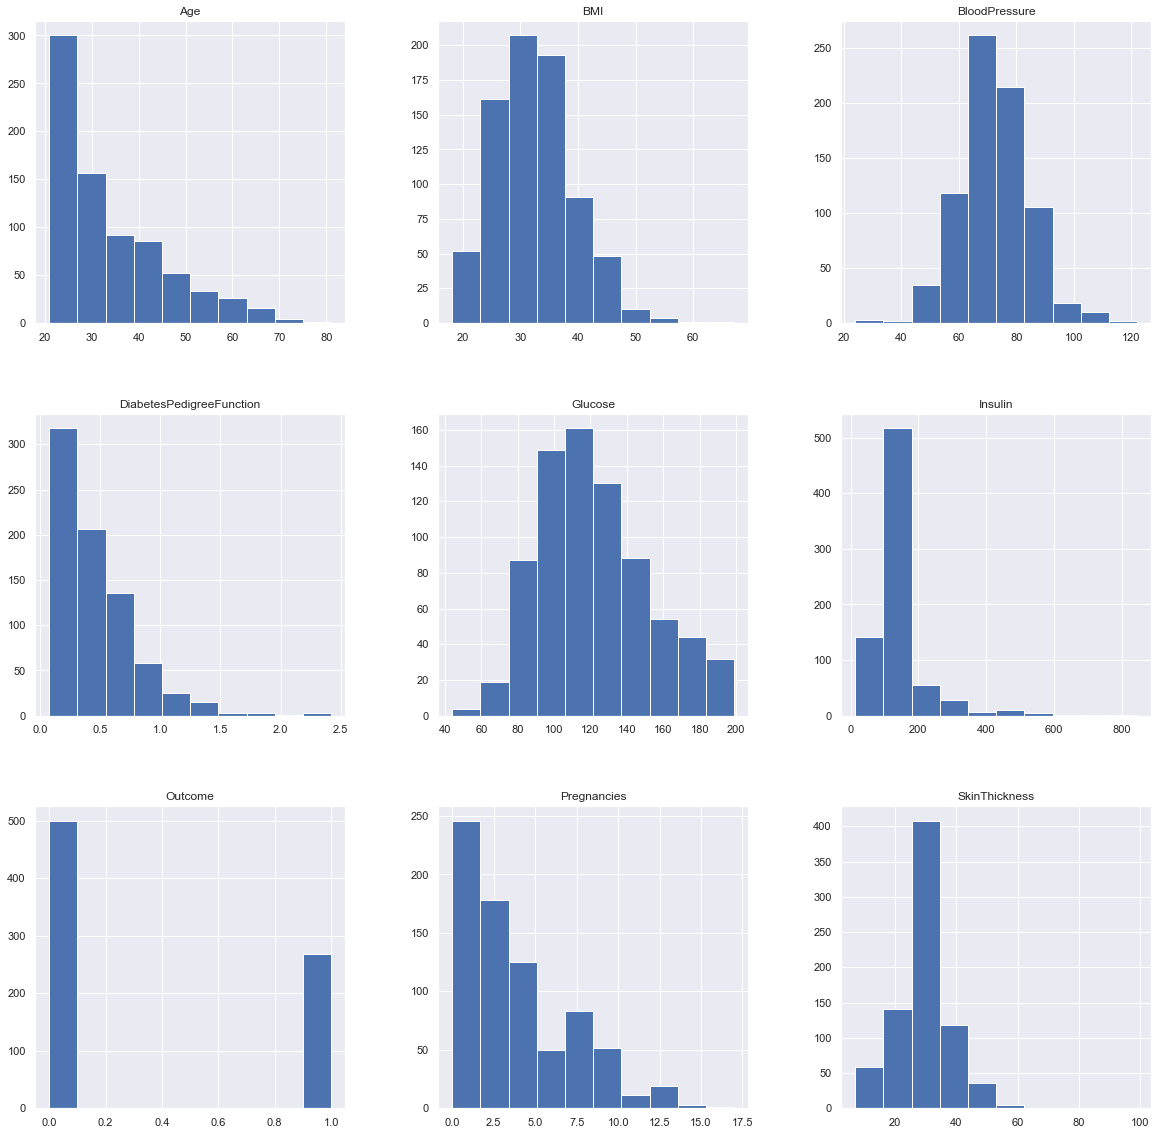

In [8]:
p = df_copy.hist(figsize = (20,20)) #after removing zero values

In [9]:
#Splitting data into train data (X) and train labels (y).
X = df_copy.iloc[:, :-1].values
y = df_copy.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

In [11]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.metrics import make_scorer

def tn(Y_test,y_pred): 
    return confusion_matrix(Y_test,y_pred)[0,0]
def fp(Y_test,y_pred): 
    return confusion_matrix(Y_test,y_pred)[0,1]
def fn(Y_test,y_pred): 
    return confusion_matrix(Y_test,y_pred)[1,0]
def tp(Y_test,y_pred): 
    return confusion_matrix(Y_test,y_pred)[1,1]

def tpr(Y_test, y_pred):
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round((tp / (tp + fn)), 2)

def spc(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    return round((tn / (tn + fp)), 2)

def recall(Y_test, y_pred):
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round((tp / (tp + fn)), 2)

def ppv(Y_test, y_pred):
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    return round((tp / (tp + fp)), 2)

def npv(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round((tn / (tn + fn)), 2)

def fpr(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    return round((fp / (tn + fp)), 2)

def fdr(Y_test, y_pred):
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    return round((fp / (tp + fp)), 2)

def fnr(Y_test, y_pred):
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round((fn / (tp + fn)), 2)

def accuracy(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round(((tp + tn) / (tp + fp + fn + tn)), 2)

def F1Score(Y_test, y_pred):
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round(((2 * tp) / ((2 * tp) + fp + fn)), 2)

def error(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round(((fp + fn) / (tp + fp + fn + tn)), 2)

def BACC(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round(0.5 * ((tp / (tp + fn)) + (tn / (fp + tn))), 2)


def TSS(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round((tp / (tp + fn)) - (fp / (fp + tn)), 2)


def HSS(Y_test, y_pred):
    tn = confusion_matrix(Y_test, y_pred)[0, 0]
    fp = confusion_matrix(Y_test, y_pred)[0, 1]
    tp = confusion_matrix(Y_test, y_pred)[1, 1]
    fn = confusion_matrix(Y_test, y_pred)[1, 0]
    return round((2 * ((tp * tn) - (fp * fn))) / 
                 (((tp + fn) * (fn + tn)) + ((tp + fp) * (fp + tn))), 2)

In [13]:
scoring = {'tp': make_scorer(tp),'tn': make_scorer(tn),'fp': make_scorer(fp),'fn': make_scorer(fn),'sensitivity': make_scorer(tpr),
           'specificity':make_scorer(spc),'recall':make_scorer(recall),'precision':make_scorer(ppv), 'Negative Predictive Value':make_scorer(npv),
           'False Positive Rate':make_scorer(fpr),'False Discovery Rate':make_scorer(fdr),'False Negative Rate':make_scorer(fnr),
           'Accuracy':make_scorer(accuracy),'F1 Score':make_scorer(F1Score),'Error':make_scorer(error),
           'BACC':make_scorer(BACC),'TSS':make_scorer(TSS),'HSS':make_scorer(HSS)}

Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
y_pred_rf = classifier_rf.predict(X_test)
#print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
accuracy_score(y_test, y_pred_rf)

[[106  19]
 [ 30  37]]


0.7447916666666666

In [17]:
from sklearn.model_selection import KFold, cross_validate
cv_rf = KFold(n_splits=10,random_state=1,shuffle=False)
metrics_rf = cross_validate(classifier_rf,X_train,y_train,scoring = scoring,cv=cv_rf)

In [18]:
parameters_rf = [value for value in metrics_rf.values()]
parameters_rf = parameters_rf[2:]

for i in range(len(parameters_rf)):
    average = round(sum(parameters_rf[i])/len(parameters_rf[i]),2)
    temp = list(parameters_rf[i])
    temp.append(average)
    parameters_rf[i]=temp
#print(parameters)  

parameters_rf = np.array(parameters_rf)
#print(parameters)
column = ['1','2','3','4','5','6','7','8','9','10','Average']
row = ['TP','TN','FP','FN','Sensitivity','Specificity','Recall','Precision','NPV','FPR','FDR','FNR','Accuracy','F1 Score','Error','BACC','TSS','HSS']
pd.DataFrame(parameters_rf, row, column)

,1,2,3,4,5,6,7,8,9,10,Average
TP,7.00,11.00,11.00,21.00,13.00,13.00,9.00,11.00,10.00,14.00,12.00
TN,33.00,34.00,34.00,22.00,36.00,31.00,31.00,32.00,39.00,27.00,31.90
FP,6.00,10.00,6.00,3.00,2.00,5.00,6.00,6.00,5.00,7.00,5.60
FN,12.00,3.00,7.00,12.00,7.00,9.00,11.00,8.00,3.00,9.00,8.10
Sensitivity,0.37,0.79,0.61,0.64,0.65,0.59,0.45,0.58,0.77,0.61,0.61
Specificity,0.85,0.77,0.85,0.88,0.95,0.86,0.84,0.84,0.89,0.79,0.85
Recall,0.37,0.79,0.61,0.64,0.65,0.59,0.45,0.58,0.77,0.61,0.61
Precision,0.54,0.52,0.65,0.88,0.87,0.72,0.60,0.65,0.67,0.67,0.68
NPV,0.73,0.92,0.83,0.65,0.84,0.78,0.74,0.80,0.93,0.75,0.80
FPR,0.15,0.23,0.15,0.12,0.05,0.14,0.16,0.16,0.11,0.21,0.15


In [19]:
from sklearn.model_selection import cross_val_score
#train model with cv of 10
cv_scores_rf = cross_val_score(classifier_rf, X_train, y_train, cv=10,scoring='accuracy')

#print each cv score (accuracy) and average them
print(cv_scores_rf)
print('cv_scores_rf mean percent:{}'.format(np.mean(cv_scores_rf*100)))

[0.66101695 0.75862069 0.72413793 0.72413793 0.82758621 0.78947368
 0.73684211 0.77192982 0.80701754 0.73684211]
cv_scores_rf mean percent:75.37604970931127


K-Nearest Neighbor Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[98 27]
 [35 32]]


0.6770833333333334

In [23]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
cv = KFold(n_splits=10,random_state=1,shuffle=False)
metrics = cross_validate(classifier,X_train,y_train,scoring = scoring,cv=cv)

In [24]:
import warnings
warnings.filterwarnings("ignore")

parameters = [value for value in metrics.values()]
parameters = parameters[2:]

for i in range(len(parameters)):
    average = round(sum(parameters[i])/len(parameters[i]),2)
    temp = list(parameters[i])
    temp.append(average)
    parameters[i]=temp
#print(parameters)  

parameters = np.array(parameters)
#print(parameters)
pd.DataFrame(parameters, row, column)
    


,1,2,3,4,5,6,7,8,9,10,Average
TP,9.00,8.00,13.00,23.00,9.00,15.00,12.00,10.00,6.00,15.00,12.00
TN,31.00,38.00,33.00,23.00,33.00,26.00,31.00,29.00,34.00,22.00,30.00
FP,8.00,6.00,7.00,2.00,5.00,10.00,6.00,9.00,10.00,12.00,7.50
FN,10.00,6.00,5.00,10.00,11.00,7.00,8.00,9.00,7.00,8.00,8.10
Sensitivity,0.47,0.57,0.72,0.70,0.45,0.68,0.60,0.53,0.46,0.65,0.58
Specificity,0.79,0.86,0.82,0.92,0.87,0.72,0.84,0.76,0.77,0.65,0.80
Recall,0.47,0.57,0.72,0.70,0.45,0.68,0.60,0.53,0.46,0.65,0.58
Precision,0.53,0.57,0.65,0.92,0.64,0.60,0.67,0.53,0.38,0.56,0.61
NPV,0.76,0.86,0.87,0.70,0.75,0.79,0.79,0.76,0.83,0.73,0.78
FPR,0.21,0.14,0.18,0.08,0.13,0.28,0.16,0.24,0.23,0.35,0.20


In [25]:
from sklearn.model_selection import cross_val_score
#train model with cv of 10
cv_scores_knn = cross_val_score(classifier, X_train, y_train, cv=10,scoring='accuracy')

#print each cv score (accuracy) and average them
print(cv_scores_knn)
print('cv_scores_knn mean percent:{}'.format(np.mean(cv_scores_knn*100)))

[0.66101695 0.82758621 0.84482759 0.77586207 0.68965517 0.70175439
 0.75438596 0.66666667 0.66666667 0.66666667]
cv_scores_knn mean percent:72.55088334512493


SVM Classifier

In [26]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred_svm = classifier_svm.predict(X_test)
#print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

In [28]:
from sklearn.model_selection import KFold, cross_validate
cv_svm = KFold(n_splits=10,random_state=1,shuffle=False)
metrics_svm = cross_validate(classifier_svm,X_train,y_train,scoring = scoring,cv=cv_svm)

In [29]:
#print(metrics_svm)

In [30]:
parameters_svm = [value for value in metrics_svm.values()]
parameters_svm = parameters_svm[2:]

for i in range(len(parameters_svm)):
    average = round(sum(parameters_svm[i])/len(parameters_svm[i]),2)
    temp = list(parameters_svm[i])
    temp.append(average)
    parameters_svm[i]=temp
#print(parameters)  

parameters_svm = np.array(parameters_svm)
#print(parameters)
pd.DataFrame(parameters_svm, row, column)

,1,2,3,4,5,6,7,8,9,10,Average
TP,12.00,10.00,10.00,17.00,9.00,12.00,8.00,10.00,8.00,13.00,10.90
TN,33.00,35.00,36.00,23.00,35.00,32.00,33.00,34.00,38.00,30.00,32.90
FP,6.00,9.00,4.00,2.00,3.00,4.00,4.00,4.00,6.00,4.00,4.60
FN,7.00,4.00,8.00,16.00,11.00,10.00,12.00,9.00,5.00,10.00,9.20
Sensitivity,0.63,0.71,0.56,0.52,0.45,0.55,0.40,0.53,0.62,0.57,0.55
Specificity,0.85,0.80,0.90,0.92,0.92,0.89,0.89,0.89,0.86,0.88,0.88
Recall,0.63,0.71,0.56,0.52,0.45,0.55,0.40,0.53,0.62,0.57,0.55
Precision,0.67,0.53,0.71,0.89,0.75,0.75,0.67,0.71,0.57,0.76,0.70
NPV,0.82,0.90,0.82,0.59,0.76,0.76,0.73,0.79,0.88,0.75,0.78
FPR,0.15,0.20,0.10,0.08,0.08,0.11,0.11,0.11,0.14,0.12,0.12


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test, y_pred_svm)

[[107  18]
 [ 28  39]]


0.7604166666666666

In [32]:
cv_scores_svm = cross_val_score(classifier_svm, X_train, y_train, cv=10,scoring='accuracy')

#print each cv score (accuracy) and average them
print(cv_scores_svm)
print('cv_scores_svm mean percent:{}'.format(np.mean(cv_scores_svm*100)))

[0.74576271 0.79310345 0.77586207 0.68965517 0.74137931 0.77192982
 0.75438596 0.75438596 0.77192982 0.77192982]
cv_scores_svm mean percent:75.7032411537318


In [33]:
models_scores_table = pd.DataFrame({'Random Forest':[metrics_rf['test_Accuracy'].mean(),
                                                     metrics_rf['test_precision'].mean(),
                                                     metrics_rf['test_recall'].mean(),
                                                     metrics_rf['test_F1 Score'].mean()],
                                    'KNN':[metrics['test_Accuracy'].mean(),
                                           metrics['test_precision'].mean(),
                                           metrics['test_recall'].mean(),
                                           metrics['test_F1 Score'].mean()],
                                   'SVM':[metrics_svm['test_Accuracy'].mean(),
                                          metrics_svm['test_precision'].mean(),
                                          metrics_svm['test_recall'].mean(),
                                          metrics_svm['test_F1 Score'].mean()]},
                                   index=['Accuracy', 'Precision', 'Recall', 'F1 Score']) 

# Add 'Best Score' column
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
# Return models performance metrics scores data frame
print(models_scores_table)

           Random Forest    KNN    SVM     Best Score
Accuracy           0.762  0.727  0.761  Random Forest
Precision          0.677  0.605  0.701            SVM
Recall             0.606  0.583  0.554  Random Forest
F1 Score           0.630  0.588  0.607  Random Forest


It appears that Random Forest Classifier has the best accuracy, recall and F1 Score and can be considered the best classifier out of the three.